# Asteroid User Guide

Asteroid is a multi-paradigm programming language that makes pattern matching one of its core computational mechanisms.  This is often called *pattern-matching oriented programming*.

In this document we describe the major features of Asteroid and give plenty of examples.  For the most part Asteroid should appear very familiar.  However, there are some features which differ drastically from other programming languages.  Here are just two:

1. All statements that look like assignments are actually pattern-match statements.  For example if I state,
```
let [x,2,y] = [1,2,3].
```
that means the subject term `[1,2,3]` is matched to the pattern `[x,2,y]` and `x` and `y` are bound to the values 1 and 3, respectively.  By the way, there is nothing wrong with this statement,
```
let [1,2,3] = [1,2,3].
```
which is just another pattern match without any variable instantiation.

2. Asteroid allows for list slicing.  Consider the example,
```
let a = [1,2,3].
let b = a @1. -- access element 1
println b.
```
The result of executing this program would be that the value `2` is printed to the screen.  On the other hand the program,
```
let a = [1,2,3].
let b = a @[1]. -- access element 1 and return it in a list
println b.
```
would print the value `[2]`.  We can take advantage of this capability to reverse the list `a` with a simple indexing operation using a list of indexes,
```
let a = [1,2,3].
let b = a @[2,1,0]. -- reverse list a
println b.
```

Let's import the Asteroid interpreter so we can run Asteroid programs in this notebook.  Be sure that you are running Jupyter with Python 3.x.

In [1]:
# let the notebook access the code folder
import sys
sys.path.insert(1,"code")

from asteroid_interp import interp 

Asteroid is implemented in Python.  In this notebook we represent programs as strings so that we can execute them with the `interp` function right here in the notebook. Asteroid also supports calling the interpreter from the command line (see the [Installing and Running](Installing and Running.ipynb) document).

## The Basics

As with most languages we are familiar with Asteroid has **variables** (alpha-numeric symbols starting with an alpha character) and **constants**.  Constants are available for all the **primitive data types**:

* `integer`
* `real`
* `string`
* `boolean`

Asteroid arranges these data types in a **type hierarchy** in order to facilitate automatic type promotion:

`boolean` < `integer` < `real` < `string`

Asteroid supports two more data types: 

* `list`
* `tuple`

These are **structured data types** in that they can contain entities of other data types. Both of these data types have the probably familiar constructors which are possibly empty squence of comma separated values enclosed by square brackets for lists and enclosed by parentheses for tuples. For tuples we have the caveat that the 1-tuple is represented by a value followed by a comma to distinguish it from parenthesized expressions, e.g.`(<something>,)`. Furthermore, the null-tuple `()` actually belongs to a different data type as we will see below.
Here are some examples,
```
let a = [1,2,3].  -- this is a list
let c = (1,2,3).  -- this is a tuple
```
In order to distinguish it from a parenthesized value the single element in a 1-tuple has to be followed by a comma, like so,
```
let one_tuple = (1,).  -- this is a 1-tuple
```
Lists and tuples themselves are also embedded in type hierarchies, although very simple ones:

* `list` < `string`
* `tuple` < `string`

That is, any list or tuple can be viewed as a string.  This is very convenient for printing lists and tuples.

Finally, Asteroid supports one more type, namely the `none` type.  The `none` type has a constant named conveniently `none`.  As mentioned above, the null-tuple is of this type and therefore the constant `()` can often be used as a convenient short hand for the constant `none`.  The `none` data type does not belong to any type hierarchy.

By now you probably figured out that statements are terminated with a period and that comments start with a `--` symbol and continue till the end of the line.  You probably also figured out that the `let` statement is Asteroid's version of assignment even though the underlying mechanism is a bit different.

## Data Structures

### Lists

In Asteroid the `list` is the fundamental, built-in data structure.  A trait it shares with programming languages such as Lisp, Python, ML, and Prolog.  Below is the list reversal example from above as an executable Asteroid program. So go ahead and experiment!

In [2]:
program = \
"""
load "io".          -- load the io module so we can print

let a = [1,2,3].    -- construct list a
let b = a @[2,1,0].  -- reverse list a
println b.
"""
interp(program)

[3,2,1]


As we have seen the `@` operator allows you to access either individual elements or slices of a list.  We can also use **list comprehensions** to construct lists,

In [3]:
program = \
"""
load "io".          

-- build a list of odd values
let a = [1 to 10 step 2].
println ("list: " + a).

-- reverse the list
let slice = [4 to 0 step -1].
let b = a @slice.
println ("reversed list: " + b).
"""
interp(program)

list: [1,3,5,7,9]
reversed list: [9,7,5,3,1]


Higher dimensional arrays can easily be simulated with lists of lists,

In [4]:
program = \
'''
load "io".

-- build a 2-D array
let b = [[1,2,3],
         [4,5,6],
         [7,8,9]].
         
-- modify an element in the array
let b @1 @1 = 0.
println b.
'''
interp(program)

[[1,2,3],[4,0,6],[7,8,9]]


**NOTE**: At this point slicing is not supported on the left side of a `let` statement.

### Custom Data Structures using 'structure'

You can introduce custom data structures using the **structure** keyword.  These custom data structures differ from lists in the sense that the name of the structure acts like a type tag.  So in some sense when you define a new structure you are introducing a new type into your program.  Here is a simple example,

In [5]:
program = \
'''
load "io".

structure Person with
    data name.
    data age.
    data gender.
    end
 
-- make a list of persons
let people = [
    Person("George", 32, "M"),
    Person("Sophie", 46, "F"),
    Person("Oliver", 21, "X")
    ].

-- retrieve the second person on the list and print
let Person(name,age,gender) = people @1.
println (name + " is " + age + " years old and is " +  gender + ".").
'''
interp(program, exceptions=True)

Sophie is 46 years old and is F.


The `structure` statement introduces a new typed data structure. In this case it introduces a data structure of type `Person` with three "slots".  We use this data structure to build a list of persons.  One of the interesting things  is that we can pattern match the generated data structure as in the second `let` statement in the program above.

It turns out that data structures defined with the `structure` command also support prototype based OO programming.  More of that below.

## The Let Statement

The `let` statement is Asteroid's version of the assignment statement.  Here is a snippet of Asteroid's grammar detailing the statement,
```
stmt := LET pattern '=' exp '.'?
```
In the grammar capital words and symbols in quotes represent language keywords and lower case letters represent non-terminals.  

The notation is an EBNF notation that means the question mark is a meta operator and makes the period at the end of the `let` statement optional.  Even though the period is optional we highly recommend using it because leaving it out can, under certain circumstances, lead to ambiguous statements and therefore will lead to syntax errors.

As we said before, the `let` statement is a pattern matching statement which we can see expressed here by the `pattern` on the left side of the `=` sign. Patterns are expressions that consist purely of constructors and variables. Constructors consist of constants, list constructors, and user defined structures.  The quote operator `'` allows you to turn any Asteroid expression into a term structure that can be used as a pattern.

Here is an example where we do some computations on the right side of a `let` statement and then match against a pattern on the left,

In [6]:
program =\
"""
load "io".

-- note 1+1 evaluates to 2 and is then matched
-- the variables x and y are bound to 1 and 3, respectively
let [x,2,y] = [1+0,1+1,1+2]. 
println (x,y).
"""
interp(program)

(1,3)


Here is a similar program but all terms have been quoted and therefore are not evaluated and the actual structure of the terms is matched,

In [7]:
program =\
"""
load "io".

-- note 1+1 does NOT evaluate to 2 and 1+1 is matched
-- the variables x and y are bound to term expressions
let [x,'1+1,y] = ['1+0,'1+1,'1+2]. 
println (x,y).
"""
interp(program)

(__plus__(1,0),__plus__(1,2))


The fact that none of the terms is being evaluated and their actual structure is being preserved becomes clear what we print what has been bound to the variables `x` and `y`.  Here the symbol `__plus__` is the internal notation of the `+` operator.

## Flow of Control Statements

Control structure implementation in Asteroid is along the lines of any of the modern programming languages such as Python, Swift, or Rust.  For example, the `for` loop allows you to iterate over lists without having to explicitly define a loop index counter.  Here is a snippet from the Asteroid EBNF grammar that shows the control statements,
```
stmt := FOR pattern IN exp DO stmt_list END FOR
      | WHILE exp DO stmt_list END WHILE
      | REPEAT DO? stmt_list UNTIL exp '.'?
      | IF exp DO stmt_list (ELIF exp DO stmt_list)* (ELSE DO? stmt_list)? END IF
      | TRY stmt_list (CATCH pattern DO stmt_list)+ END TRY
      | THROW exp '.'?
      | BREAK '.'?
```
Looking at the list of supported flow of control statements there are really not a lot of surprises.  For example, here is a short program with a `for` loop that prints out the first ten even positive integers,

In [8]:
program =\
"""
load "io".
for i in 0 to 10 step 2 do
    println i
end 
"""
interp(program)

0
2
4
6
8
10


Here is another example that iterates over lists,

In [9]:
program = \
"""
load "io".

for bird in ["turkey","duck","chicken"] do
    println bird.
end
"""
interp(program)

turkey
duck
chicken


Even though Asteroid's flow of control statements look so familiar they support pattern matching to a degree not found in other programming languages and which we will take a look at below.

## Functions

Here is the grammar snippet that defines functions,
```
stmt      := FUNCTION ID body_defs END FUNCTION
body_defs := WITH pattern DO stmt_list (ORWITH pattern DO stmt_list)*
```
A closer look reveals that a function can have multiple bodies each associated with a different formal argument pattern.  Asteroid inherits this characteristic directly from functional languages like ML or Haskell.

However, considering that a variable represents the simplest pattern we can write functions that look very familiar to the programmer coming from the Python or Java traditions.  Here is a function that reverses a list,

In [10]:
program =\
'''
load "util".
load "io".

function reverse with list do
    let len = length(list).
    let r_list = list @[(len-1) to 0 step -1].
    return r_list.
end 

let my_list = [1,2,3].
let my_reversed_list = reverse(my_list).
println my_reversed_list.
'''
interp(program)

[3,2,1]


We'll talk about pattern matching in functions and multiple bodies later on in this document.  Asteroid also supports anonymous or `lambda` functions.  Here is a snippet of the grammar that defines anonymous functions,
```
primary := LAMBDA body_defs 
```
where the `body_defs` are the same as for the functions defined above.  This implies that `lambda` functions can also have multiple bodies each associated with a different formal argument pattern.  Here is a simple example using a `lambda` function,

In [11]:
program = \
'''
load "io".

println ((lambda with n do return n+1) 1).
'''
interp(program)

2


## Basic Pattern Matching

Pattern matching lies at the heart of Asteroid and the ability of manipulating the interpretation of expression terms allows the developer to pattern match on operator symbols usually reserved for value computations.  We saw some of Asteroid's pattern match ability when we discussed the `let` statement.  Below is another program that highlights a few other aspects of pattern matching.
In particular, quoted expressions allow the programmer to treat expressions as constructor terms in the presence of a model other than the default model and pattern match against that structure.  Quoted expressions can be interpreted in the current model using the `eval` function as shown in the following.  All of the statements execute correctly.  In the case that a statement is expected to fail we put it into a try-catch block.

In [12]:
program =\
"""
load "io".

let '1 + 1 = '1 + 1. -- quoted expression
let 2 = eval('1 + 1). 
let 2 = 1 + 1.
try
    let '1 + 1 = 1 + 1.  -- throws an exception
catch _ do
    println "1+1 pattern match failed".
end 
"""
interp(program)

1+1 pattern match failed


Asteroid supports pattern matching on function arguments in the style of ML and many other functional programming languages.
    Below is the quick sort implemented in Asteroid as an example of this classic style pattern matching.  What is perhaps new is the `head-tail` operator being used in the last `orwith` clause.  Here the variable `pivot` matches the first element of the list and the variable `rest` matches the remaining list which is the original list with its first element removed.  We can  also see that the `+` operator symbols are overloaded operators in the standard model to act as a list concatenation operators in addition to arithmetic operators. What you also will notice is that function calls do not necessarily have to involve parentheses.  Function application is also expressed by simple juxtaposition in Asteroid.  For example, if `foobar` is a function then `foobar(a)` is a function call in Asteroid but so is `foobar a`.  The latter form of function call is used in the last line of the function `qsort` below.

In [13]:
program =\
"""
load "io".

function qsort
    with [] do
        return [].
    orwith [a] do
        return [a].
    orwith [pivot|rest] do 
        let less=[].
        let more=[].
        
        for e in rest do
            if e < pivot do
                let less = less + [e].
            else
                let more = more + [e].
            end 
        end 
        
        return qsort less + [pivot] + qsort more.
    end 
    
-- print the sorted list
println (qsort [3,2,1,0])
"""
interp(program)

[0,1,2,3]


We can also introduce our own custom constructors and use them in pattern matching.  The program below implements [Peano addition](https://en.wikipedia.org/wiki/Peano_axioms#Addition) on terms using the two Peano axioms,
```
x + 0 = x
x + S(y) = S(x+y)
```
Here `x` and `y` are variables, `0` represents the natural number with value zero, and `S` is the successor function.  In Peano arithmetic any natural number can be represented by the appropriate number of applications of the successor function to the natural number `0`. Here is the program, 

In [14]:
program =\
"""
-- implements Peano addition on terms
load "io".
load "util".

structure S with
    data x.
    end 
    
structure add with
    data left.
    data right.
    end

function reduce
    with add(x,0) do      
        return reduce(x).
    orwith add(x,S(y))  do
        return S(reduce(add(x,y))).
    orwith term do     
        return term.
    end 

println(reduce(add(S(S(0)),S(S(S(0)))))).

"""
interp(program)

S(S(S(S(S(0)))))


Our program defines the structure `S` to represent the successor function and the structure `add` to represent peano addition. Next, it defines a function that uses pattern matching to identify the left sides of the two axioms.  If either pattern matches the input to the `reduce` function it will activate the corresponding function body and rewrite the term recursively in an appropriate manner.  We have one additional pattern which matches if neither one of the Peano axiom patterns matches and terminates the recursion.  Finally,  on the last line, we use our `reduce` function to compute the Peano term for the addition of 2 + 3. As expected, the output of this program is,
```
S(S(S(S(S(0)))))
```

## Pattern Matching in Control Structures

Before we begin the discussion we need to introduce the `is` predicate  which is a built-in operator that takes the pattern on the right side and applies it to the subject term on the left side.  If there is a match the predicate will return `true` if not then it will return `false`.  Here is a snippet that illustrates the predicate,
```
let true = '1 + 2 is 'x + y.
``` 
The subject term `1 + 2` is matched to the pattern `x + y` which of course will succeed with the variable bindings `x`  &#x21A6; `1` and `y` &#x21A6; `2`.

### Pattern Matching in `if` Statements 

In Asteroid an `if` statement consists of an `if` clause followed by zero or more `elif` clauses followed by an optional `else` clause.  The semantics of the `if` statement is fairly standard.  The `if` and `elif` clauses test the value of their corresponding expressions for the term `true` and execute their corresponding set of statements if it does evaluate to `true`.  If none of the expressions evaluate to `true` then the `else` clause is executed if present.

In order to enable pattern matching in `if` statements we use the `is` predicate.  We can rewrite the `reduce` function from the above Peano arithmetic example using pattern matching in `if` statements as an illustration,
```
function reduce with term do
    if term is add(x,0) do
        return reduce(x).
    elif term is add(x,S(y))  do
        return S(reduce(add(x,y))).
    else do
        return term.
    end -- if
    end -- function
```
One thing to note is that the variable bindings of a successful pattern match are immediately available in the corresponding statements of the `if` or `elif` clause.

### Pattern Matching in `repeat-until` Loops

Pattern matching in `while` loops follows a similar approach to pattern matching in `if` statements.  The `while` statement tests the evaluation of the loop expression and if it evaluates to the term `true` then the loop body is executed.  Again we use the `is` predicate to enable pattern matching in `while` loops.

The example below shows a program that employs pattern matching using the head-tail operator in the `repeat-until` loop expression in order to iterate over a list and print the list elements.  Note the use of the `is` predicate to test whether the list is empty or not.  

In [15]:
program =\
'''
load "io".

let list = [1,2,3].

repeat do
    let [head|tail] = list. 
    println head.
    let list = tail.
until list is []. 
'''
interp(program)

1
2
3


### Pattern Matching in `for` Loops 

For completeness sake we have repeated here an example of a simple `for` from above,

In [16]:
program = \
"""
load "io".

for bird in ["turkey","duck","chicken"] do
    println bird.
end 
"""
interp(program)

turkey
duck
chicken


Turns out that in simple `for` loops such as the one above the loop variable is actually a pattern that gets matched to the list the loop iterates over.
We can expand this simple pattern into a much more complicated pattern and do pattern matching while we are iterating.  This allows us to access substructures of the items being iterated over in a direct and succinct way.  The example below shows such a program.  The program constructs a list of `Person` structures that consist of a name and an age.  The `for` loop iterates over this list while pattern matching the `Person` constructor at each iteration binding the age variable to the appropriate value in the structure.  In the loop body it carries a running sum of the age values which it then uses to compute the average age of the persons on the list.  

In [17]:
program =\
'''
load "io".

structure Person with
    data name.
    data age.
    end

let people = [ 
    Person("George", 32),
    Person("Sophie", 46),
    Person("Oliver", 21)
    ].
    
let n = people @length().
let sum = 0.

for Person(_,age) in people do 
    let sum = sum + age.
end 

println ("Average Age: " + (sum/n)). 
'''
interp(program)

Average Age: 33


We can also use pattern matching in a `for` loop to select certain items from a list. Suppose we want to print out the names of persons that contain a lower case 'p',

In [18]:
program =\
'''
load "io".

structure Person with
    data name.
    data age.
    end

-- define a list of persons
let people = [
    Person("George", 32),
    Person("Sophie", 46),
    Person("Oliver", 21)
    ].

-- print names that contain 'p'
for Person(name:".*p.*",_) in people do
  println name.
end
'''
interp(program)

Sophie


Here we pattern match the `Person` object in the `for` loop and then use a regular expression to see if the name of that person matches our requirement that it contains a lower case 'p'.  We can tag the pattern with a variable name so that we can print out the name if the reglar expression matches.

### Pattern Matching in `try-catch` Statements

Exception handling in Asteroid is very similar to exception handling in many of the other modern programming language available today.  The example below shows an Asteroid program that performs basic exception handling.  It attempts a division by zero which will throw an exception.  The exception is caught by the `catch` clause  and its value is printed to the terminal.  

In [19]:
program =\
'''
load "io".

try
    let i = 10/0. 
    println i.
catch e do 
    println e. 
end 
'''
interp(program)

(Exception,integer division or modulo by zero)


By default, exceptions in Asteroid are pairs where the first component is an exception specifier and the second component is the value of the exception. In Asteroid we can pattern match on the structure of exceptions in the `catch` clause.  The example below shows the same program from above where the `catch` clause  has been modified to match the structure on the exception explicitly.  Here we pattern match on the exception specifier and print out the value of the exception.  

In [20]:
program =\
'''
load "io".

try
    let i = 10/0.
    println i.
catch ("Exception", v) do 
    println v.  
end 
'''
interp(program)

integer division or modulo by zero


The structure of the exceptions as shown in the previous examples are by convention only and all internally generated exceptions in Asteroid follow that convention.  However, there is nothing to prevent the user from creating their own exception structures and objects and pattern match on them in  `catch` clauses.  The example below shows a program that throws an exception using the `MyException` constructor.  That exception structure is pattern matched in the `catch` clause and its value is printed to the terminal.  

In [21]:
program =\
'''
load "io".

structure MyException with 
    data e.
    end

try
    throw MyException("Hello There!").
catch MyException(v) do
    println v. 
end 
'''
interp(program)

Hello There!


## Object-Oriented Programming and Pattern Matching

We introduce Asteroid's objects using the dog example from the [Python documentation](https://docs.python.org/3/tutorial/classes.html).  The code below shows that Python example translated into Asteroid.  Asteroid's object system is prototype based.  Classes are introduced with the `class` keyword and the class name serves as a new type. The class name itself also serves as a constructor call in order to instantiate new objects.
Asteroid generates an implicit object reference as the first argument to the called function.  Notice that at the call site  we only provide a single argument whereas the function definition has two arguments; the first one capturing the object reference.


In [22]:
program = \
'''
load "io".

structure Dog with

  data name.
  data tricks.

  function add_trick
    with (self, new_trick) do
      let self @tricks = self @tricks + [new_trick].
    end 
    
  function __init__
    with (self, name) do 
      let self @name = name.
      let self @tricks = [].
    end 
    
  end 

-- Fido the dog
let fido = Dog("Fido").
fido @add_trick("roll over").
fido @add_trick("play dead").

-- Buddy the dog
let buddy = Dog("Buddy").
buddy @add_trick("roll over").
buddy @add_trick("sit stay").

-- print out the tricks
println ("Fido: " + fido @tricks).
println ("Buddy: " + buddy @tricks).

'''
interp(program)

Fido: [roll over,play dead]
Buddy: [roll over,sit stay]


In order to demonstrate pattern matching with objects we added a third dog and added a list of dogs to our program. The resulting program below shows this and we also added code that iterates over the list of the dogs and prints out the names of the dogs whose first trick is `roll over`.  The filtering of the objects on the list is done via pattern matching in the `for` loop.

In [23]:
program =\
'''
load "io".

structure Dog with

  data name.
  data tricks.

  function add_trick
    with (self, new_trick) do
      let self @tricks = self @tricks + [new_trick].
    end 
    
  function __init__
    with (self, name) do 
      let self @name = name.
      let self @tricks = [].
    end 
    
  end -- structure

-- Fido the dog
let fido = Dog("Fido").
fido @add_trick("roll over").
fido @add_trick("play dead").

-- Buddy the dog
let buddy = Dog("Buddy").
buddy @add_trick("roll over").
buddy @add_trick("sit stay").

-- Fifi the dog
let fifi = Dog("Fifi").
fifi @add_trick("sit stay").

-- print out all the names of dogs
-- whose first trick is 'roll over'.
let dogs = [fido, buddy, fifi]. 

for Dog(name, ["roll over"|_]) in dogs do
    println (name + " does roll over").
end 

'''
interp(program)

Fido does roll over
Buddy does roll over


There is an elegant way of rewriting the last part of the code of the above example using the fact that in Asteroid patterns are first class citizens.  In the program below we associate our pattern with the variable `dog`. The quote at the beginning of the pattern is necessary otherwise Asteroid will try to dereference the variable `name` as well as the anonymous variables `_`. We use the pattern associated with `dog` in the `for` loop in order to filter the objects on the list. The `*` operator is necessary in order to tell Asteroid to use the pattern associated with the variable `dog` rather than using the variable itself as a pattern.

In [24]:
program =\
'''
load "io".

structure Dog with

  data name.
  data tricks.

  function add_trick
    with (self, new_trick) do
      let self @tricks = self @tricks + [new_trick].
    end 
    
  function __init__
    with (self, name) do 
      let self @name = name.
      let self @tricks = [].
    end 
    
end -- structure

-- Fido the dog
let fido = Dog("Fido").
fido @add_trick("roll over").
fido @add_trick("play dead").

-- Buddy the dog
let buddy = Dog("Buddy").
buddy @add_trick("roll over").
buddy @add_trick("sit stay").

-- Fifi the dog
let fifi = Dog("Fifi").
fifi @add_trick("sit stay").

-- print out all the names of dogs
-- whose first trick is 'roll over'.
let dogs = [fido, buddy, fifi]. 

-- define our pattern
let dog = 'Dog(name, ["roll over"|_]).

-- iterate over dogs applying our pattern
-- only if the pattern match is successful will the loop body be executed
for *dog in dogs do 
  println (name + " does roll over").
end 
'''
interp(program)

Fido does roll over
Buddy does roll over


## Patterns as First Class Citizens

We have shown in the above program that patterns can be associated with and dereferenced from variables.  The program below illustrates that we can also pass patterns to functions where they can be used for pattern matching.  Here we define a function `match` that expects a subject term and a pattern.  It proceeds to pattern match the subject term to the pattern using the `is` predicate and returns whatever the predicate returns.  Observe the `*` operator in front of the `pattern` variable stating that we want to use the pattern associated with that variable.  In the program we call the function `match` with subject term `1+1` and pattern `_+_`.  

In [25]:
program =\
'''
load "io".

function match with (subject,pattern) do
    return subject is *pattern.
    end 
    
println (match('1+1, '_+_)). 
'''
interp(program)

true


We can also construct patterns on-the-fly as shown below.  Here we construct two subpatterns `cl` and `cr`.  These two subpatterns are used to construct the full pattern `p` when the pattern is evaluated during a pattern match. Finally, we check whether our pattern is assembled correctly on last line.  The output of the program is `true` meaning our pattern has the same structure as the subject term `1+2+3`.

In [26]:
program =\
'''
load "io".

let cl = '_ + _. 
let cr = '3.
let p = 'cl + cr.

println (('1+2+3) is *p).
'''
interp(program)

true


With Asteroid's ability to manipulate patterns we can rewrite the Peano addition program from above.  In the rewritten version below the pertinent Peano axioms are stored as rules in a rule table which the program will access during execution.   Our two Peano axioms appear as rules in the rule table.  Note that each rule is written as a pair where the first component is the left side of the corresponding rule and the second component is the right side of the corresponding rule.  The left sides of the rules represent the patterns that need to match the subject term and therefore it is not surprising that they are written as quoted expressions.  We also need to write the right sides of the rules as quoted expressions because we want to delay their evaluations until their corresponding patterns have matched an appropriate subject term.

The function `reduce` searches through the rule table for a match to the current subject term `term`.  If a match is found the corresponding right side of the rule is evaluated.  If no match is found then the term is returned unmodified.  The output of the program is of course the Peano term `S(S(S(S(S(0)))))`.

In [27]:
program =\
'''
load "io".

structure S with
    data x.
    end 
    
structure add with
    data left.
    data right.
    end .

let rule_table = [
    ('add(x,0), 'reduce(x)),
    ('add(x,S(y)), 'S(reduce(add(x,y))))
    ].

function reduce 
    with term do
        for i in 0 to rule_table@length() - 1 do
            let (lhs, rhs) = rule_table@i.
            if term is *lhs do
                return eval rhs.
            end 
        end 
        return term.
    end 

println (reduce('add(S(S(0)),S(S(S(0)))))).

'''
interp(program)

S(S(S(S(S(0)))))


## Escaping Asteroid

The Asteroid interpreter is written in Python and the `escape` expression gives the user full access to the Python ecosystem from within Asteroid code.  In particular it gives the user access to the intperpreter internals making it easy to write interpreter extensions.  The following example shows one way to incorporate graphics into Asteroid programs,

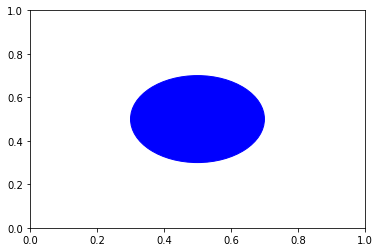

In [28]:
program = \
'''
function circle with (x, y, r) do escape
"
from asteroid_state import state

# get the function parameters from the symbol table
vx = float(state.symbol_table.lookup_sym('x')[1])
vy = float(state.symbol_table.lookup_sym('y')[1])
vr = float(state.symbol_table.lookup_sym('r')[1])

# plot the circle at (vx,vy) with radius vr
import matplotlib.pyplot as plt

circle = plt.Circle((vx, vy), vr, color='blue')
fig, ax = plt.subplots()
ax.add_artist(circle)
plt.show()
"
end

-- call the escaped function
circle(.5, .5, .2)
'''
interp(program)

## Asteroid I/O

**Println** is a function that prints its argument in a readable form to the terminal.  Remember that under the standard model the `+` operator also implements string concatenation.  This allows us to construct nicely formatted output strings,

In [29]:
program =\
'''
load "io".

let a = 1.
let b = 2.
println ("a + b = " + (a + b)).
'''
interp(program)

a + b = 3


**Input** is a function that given a prompt string will prompt the user at the terminal and return the input value as a string.  Here is a small example,

In [30]:
program =\
'''
load "io".

let name = input("What is your name? ").
println ("Hello " + name + "!").
'''
interp(program)

What is your name? Leo
Hello Leo!


We can use the type casting functions such as `integer` or `real` to convert the string returned from `input` into a numeric value,

In [31]:
program =\
'''
load "io".
load "util".

let i = integer(input("Please enter a positive integer value: ")).

if i < 0 do
    throw ("Exception", "I want a positive integer value.").
end 

for k in 1 to i do
    println k.
end 
'''
interp(program)

Please enter a positive integer value: 3
1
2
3


**Raw_print** is a function similar to **println** except that it outputs Asteroid's internal term structure for the given argument,

In [32]:
program =\
'''
load "io".

let a = 1.
let b = 2.
raw_print ("a + b = " + (a + b)).
'''
interp(program)

('string', 'a + b = 3')


Try the above program with the `standard` model commented out.  In that case none of the `+` operation will be performed because here `+` is now considered a constructor.

## The Module System

A module in Asteroid is a file with a set of valid Asteroid statements.  You can include this file into other Asteroid code with the `load "<filename>".` statement.  In the current version of Asteroid modules do not have a separate name space, symbols from a module are entered into Asteroid's global name space.

The search strategy for a module to be loaded is as follows,
1. raw module name - could be an absolute path
1. search in current directory (path[1])
1. search in directory where Asteroid is installed (path[0])
1. search in subdirectory where Asteroid was started
